In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re


In [128]:
input_folder = "../clean_data/"
output_folder = "../final_data/"

# User

In [129]:
users = pd.read_csv(input_folder + 'users.csv')
users

,User-ID,Location,Age,Rating Count,Average Rating
0,243,"arden hills, minnesota, usa",NaN,7.0,8.142857
1,254,"minneapolis, minnesota, usa",24.0,12.0,8.583333
2,638,"san diego, california, usa",20.0,19.0,9.473684
3,805,"sonoma, california, usa",34.0,6.0,9.000000
4,882,"berkeley, california, usa",23.0,6.0,10.000000
...,...,...,...,...,...
2547,278202,"coral springs, florida, usa",NaN,5.0,4.600000
2548,278418,"omaha, nebraska, usa",NaN,13.0,6.461538
2549,278582,"slidell, louisiana, usa",NaN,5.0,8.400000
2550,278633,"sandy, utah, usa",NaN,12.0,8.000000


## Age

In [130]:

users.loc[users['Age'] < 6, 'Age'] = np.nan
users.loc[users['Age'] > 100, 'Age'] = np.nan

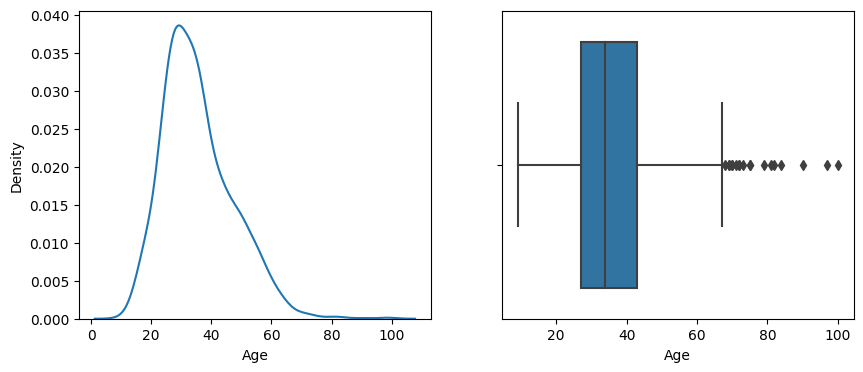

In [131]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

_ = sns.kdeplot(users['Age'], ax=ax1)
_ = sns.boxplot(x=users['Age'], ax=ax2)


## Countries

In [132]:
countries = users['Location'].str.extract(r'(\w+)$')
countries.columns = ['Country']
countries['Country'].value_counts()
users['Country'] = countries['Country']
users

,User-ID,Location,Age,Rating Count,Average Rating,Country
0,243,"arden hills, minnesota, usa",NaN,7.0,8.142857,usa
1,254,"minneapolis, minnesota, usa",24.0,12.0,8.583333,usa
2,638,"san diego, california, usa",20.0,19.0,9.473684,usa
3,805,"sonoma, california, usa",34.0,6.0,9.000000,usa
4,882,"berkeley, california, usa",23.0,6.0,10.000000,usa
...,...,...,...,...,...,...
2547,278202,"coral springs, florida, usa",NaN,5.0,4.600000,usa
2548,278418,"omaha, nebraska, usa",NaN,13.0,6.461538,usa
2549,278582,"slidell, louisiana, usa",NaN,5.0,8.400000,usa
2550,278633,"sandy, utah, usa",NaN,12.0,8.000000,usa


In [133]:

countries_to_select = ['usa', 'canada', 'kingdom', 'australia']
selected_users = users[users['Country'].isin(countries_to_select)]
# not_selected_users = users[~users['Country'].isin(countries_to_select)]

## Average Rating

In [134]:
users[users['Average Rating'] > 10]

,User-ID,Location,Age,Rating Count,Average Rating,Country


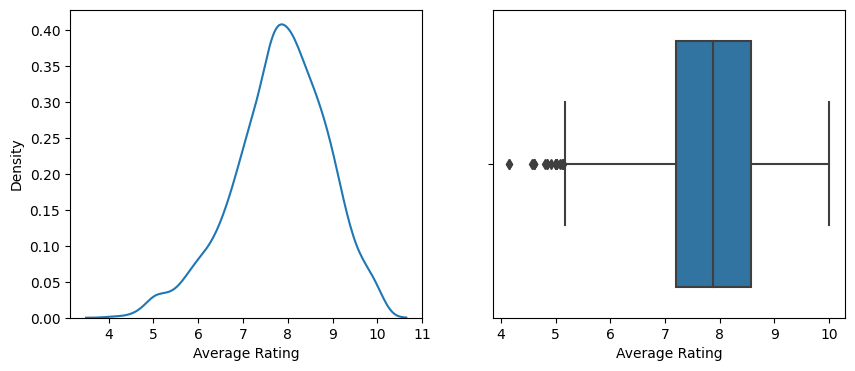

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

_ = sns.kdeplot(users['Average Rating'], ax=ax1)
_ = sns.boxplot(x=users['Average Rating'], ax=ax2)

In [136]:
users.to_csv(output_folder + 'users.csv', index=False)

# Ratings

In [137]:
ratings = pd.read_csv(input_folder + 'ratings.csv')
ratings

,User-ID,Book-Rating,Book Title
0,277157,5,City of Bones
1,277157,6,Balance of Power
2,277157,5,Saving Faith
3,277157,7,Perchance to Dream
4,277157,7,Potshot
...,...,...,...
29831,276680,9,A Simple Plan
29832,276680,10,Mystic River
29833,276680,6,Salem Falls
29834,276680,10,Affinity


Average: 7.868648612414533


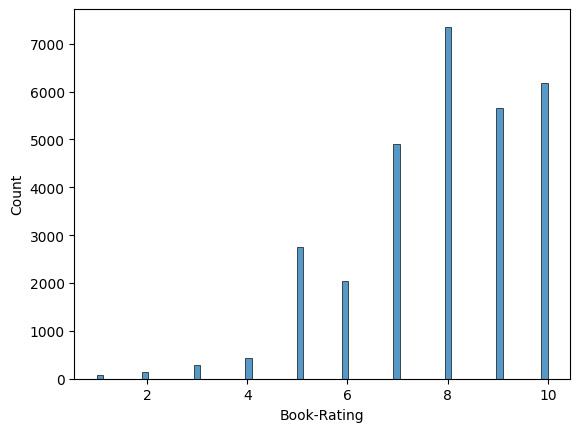

In [138]:
_ = sns.histplot(ratings['Book-Rating'])
print(f"Average: {ratings['Book-Rating'].mean()}")

In [139]:
ratings.to_csv(output_folder + 'ratings.csv', index=False)

# Books

In [140]:
books = pd.read_csv(input_folder + 'books.csv')
books[:3]

,Book Title,Author,Publication Year,Genres,Summary,Rating Count,Average Rating,Number of Pages,Best Seller,Film,Saga,Followed by,Preceded by
0,Davita's Harp,Chaim Potok,1990.0,NaN,"In New York City of the 1930s, Ilana Davita C...",12.0,7.714286,371.0,No,No,No,NaN,NaN
1,Assassin's Quest,Robin Hobb,1997.0,['Fantasy'],FitzChivalry Farseer has been raised from deat...,0.0,NaN,742848.0,False,False,The Farseer Trilogy,NaN,Royal Assassin
2,The Ill-Made Knight,Meg Cabot,1940.0,['Fantasy'],Much of The Ill-Made Knight takes place mainly...,0.0,NaN,291.0,False,False,The Once and Future King,The Candle in the Wind,The Queen of Air and Darkness


In [141]:
books[books["Publication Year"] < 1400]

,Book Title,Author,Publication Year,Genres,Summary,Rating Count,Average Rating,Number of Pages,Best Seller,Film,Saga,Followed by,Preceded by
7825,The Tale of Genji,Murasaki Shikibu,1021.0,['Fiction'],The work recounts the life of a son of the Ja...,1.0,NaN,NaN,No,Yes,No,NaN,NaN


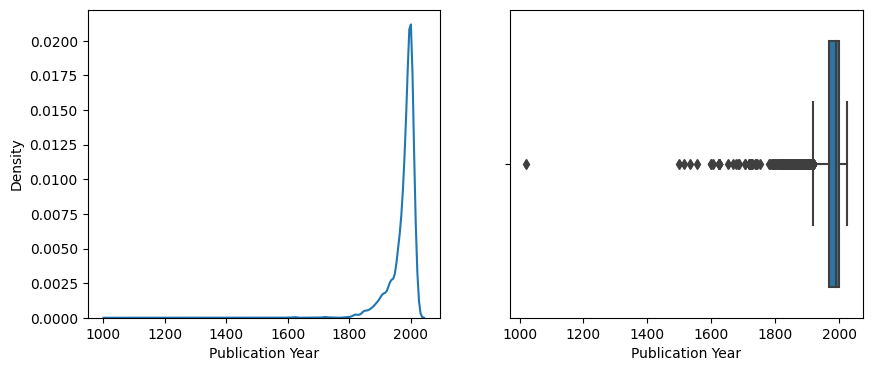

In [142]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

_ = sns.kdeplot(books['Publication Year'], ax=ax1)
_ = sns.boxplot(x=books['Publication Year'], ax=ax2)

## Film

In [143]:
books['Film'][books['Film'] == 'False'] = 'No'
books['Film'][books['Film'] == 'True'] = 'Yes'
books['Film'].value_counts()

C:\Users\Noel Nathan\AppData\Local\Temp\ipykernel_8536\3361782967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Film'][books['Film'] == 'False'] = 'No'
C:\Users\Noel Nathan\AppData\Local\Temp\ipykernel_8536\3361782967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Film'][books['Film'] == 'True'] = 'Yes'


Film
No     5902
Yes    4289
Name: count, dtype: int64

## Best-Seller

In [144]:
books['Best Seller'][books['Best Seller'] == 'False'] = 'No'
books['Best Seller'][books['Best Seller'] == 'True'] = 'Yes'
books['Best Seller'].value_counts()

C:\Users\Noel Nathan\AppData\Local\Temp\ipykernel_8536\8634830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Best Seller'][books['Best Seller'] == 'False'] = 'No'
C:\Users\Noel Nathan\AppData\Local\Temp\ipykernel_8536\8634830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Best Seller'][books['Best Seller'] == 'True'] = 'Yes'


Best Seller
No     9454
Yes     737
Name: count, dtype: int64

In [145]:
books.to_csv(output_folder + 'books.csv', index=False)

## Genres

In [146]:
books = pd.read_csv('../generated/' + 'books.csv')
lambda x : re.sub(r'[\'\[\]]', '', x).split(', ')

genres = dict()


# split_pattern  = re.compile(r'[&(, )/]')
split_pattern  = re.compile(r'[&/]|, | and')
replace_pattern = re.compile(r'[\"\n\\\'\[\]\d\;\(\)]')
sepator_pattern = re.compile(r'([a-z])([A-Z])') # novelSpiritualSelf-Help -> novel Spiritual Self-Help

for row in books['Genres']:

    if row is np.nan:
        continue
    

    for genre in re.split(split_pattern, re.sub(replace_pattern, '', re.sub(sepator_pattern, r'\1 \2', row).lower())):
        if len(genre) < 3:
            continue
        if genre not in genres:
            genres[genre] = 0
        genres[genre] += 1

genres.pop('', None)
        

sorted_dict_by_values = sorted(genres.items(), key=lambda item: item[1], reverse=True)
# sorted_dict_by_values = {genre: count for genre, count in sorted_dict_by_values if count >= 5}

print(len(sorted_dict_by_values))
sorted_dict_by_values

# genre_list = [[genre, count] for genre, count in sorted_dict_by_values if count > 8]

    
# for genre, count in sorted_dict_by_values:
#     is_genre = True
#     for i, (genre2, count2) in enumerate(genre_list):
#         if count > 8:
#             continue
#         if genre2 in genre:
#             genre_list[i][1] += count
#             genre = genre.replace(genre2, '')
#             is_genre = False
#             if genre == '':
#                 break
#     if is_genre:
#         genre_list.append([genre, count])

# len(genre_list)

# genre_list

['childrens literature', 'mistery', 'fantasy', 'speculative fiction', 'suspense', 'crime fiction', 'thriller', 'young adult literature', 'horror', 'historical', 'romance', 'comedy', 'humour']

10881
181


[('fiction', 2182),
 ('speculative fiction', 1644),
 ('novel', 1012),
 ('science fiction', 909),
 ('childrens literature', 761),
 ('fantasy', 691),
 ('mystery', 536),
 ('suspense', 383),
 ('crime fiction', 330),
 ('thriller', 253),
 ('young adult literature', 236),
 ('horror', 213),
 ('historical novel', 212),
 ('romance novel', 173),
 ('historical fiction', 133),
 ('detective fiction', 83),
 ('dystopia', 67),
 ('adventure novel', 60),
 ('comedy', 57),
 ('spy fiction', 53),
 ('alternate history', 53),
 ('autobiography', 50),
 ('satire', 47),
 ('non-fiction', 45),
 ('gothic fiction', 44),
 ('war novel', 36),
 ('comic novel', 34),
 ('biography', 34),
 ('techno-thriller', 32),
 ('novella', 30),
 ('autobiographical novel', 29),
 ('humour', 28),
 ('utopian', 27),
 (' dystopian fiction', 27),
 ('reference', 20),
 ('picture book', 20),
 ('bildungsroman', 19),
 ('western', 19),
 ('black comedy', 17),
 ('memoir', 17),
 ('high fantasy', 16),
 ('apocalyptic', 16),
 (' post-apocalyptic fiction', 1

In [147]:
X = books['Genres'].apply(lambda x : len(x.split(', ')) if type(x) == str else 0)

sum(X > 3)

1146

# Authors

In [148]:
authors = pd.read_csv(input_folder + 'authors.csv')
authors

,Name,Birth Year,Genres,Books
0,Amy Tan,1952.0,"[""Children's book""]","['The Joy Luck Club (novel)', ""The Kitchen God..."
1,John Grisham,1955.0,"['Legal thriller', ' young adult']","['A Time to Kill (Grisham novel)', 'Sycamore R..."
2,Michael Crichton,1942.0,NaN,"['The Andromeda Strain', 'The Terminal Man', '..."
3,Harper Lee,1926.0,['Fiction'],"['To Kill a Mockingbird', 'Go Set a Watchman',..."
4,Barbara Kingsolver,1955.0,Historical fiction,[]
...,...,...,...,...
2116,Li Zhisui,1919.0,NaN,[]
2117,Steve Perry,1949.0,NaN,['The Case of the Curious Bride']
2118,E.L. Konigsburg,1930.0,"Children's novels, short stories, picture books",[]
2119,Louis Guilloux,1899.0,NaN,[]


## Average Rating

Create average rating  for authors 

In [149]:
# authors.rename(columns={'Name': 'Author'}, inplace=True)
# avg_ratings_authors = ratings.merge(books, on='Book Title', how='left').merge(authors, on='Author', how='left').groupby('Author')['Book-Rating'].mean()
# count_ratings_authors = ratings.merge(books, on='Book Title', how='left').merge(authors, on='Author', how='left').groupby('Author')['Book-Rating'].count()

# avg_ratings_authors.rename('Average Rating', inplace=True)
# count_ratings_authors.rename('Count Rating', inplace=True)


# authors.merge(avg_ratings_authors, on='Author', how='left').merge(count_ratings_authors, on='Author', how='left')